In [1]:
import pandas as pd
import requests
import time
from sqlalchemy import create_engine 
import json
import ast

In [2]:
from sqlalchemy import create_engine
with open('../server.json', 'r', encoding='utf-8') as fichier :
    donnees = json.load(fichier)

user = donnees["USER"]
password = donnees["PASSWORD"]
host = 'localhost'
port = '5432'
database = 'Champ_selectbdd'

# Chaîne de connexion
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}')

table_name = 'Matchs'

# Lecture de la table dans un DataFrame
matchs = pd.read_sql(table_name, engine)
engine.dispose()
matchs['bans'] = matchs['bans'].apply(lambda x: ast.literal_eval(x))
matchs.head(10)

,matchId,bans,teamId,win,kda,killParticipation,goldPerMinute,damagePerMinute,soloKills,skillshotsDodged,...,totalDamageShieldedOnTeammates,totalHeal,goldSpent,goldEarned,totalEnemyJungleMinionsKilled,totalAllyJungleMinionsKilled,lane,killingSprees,totalMinionsKilled,elo
0,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,1.285714,0.562500,366.490548,795.600731,1,15,...,0,6393,10400,10574,0,0,TOP,1,186,PLATINUM
1,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,1.200000,0.375000,312.655111,156.457063,0,5,...,0,12508,9075,9021,0,0,JUNGLE,0,11,PLATINUM
2,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,2.666667,0.500000,401.543168,681.093465,1,20,...,0,3958,9975,11586,0,0,TOP,1,239,PLATINUM
3,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,1.800000,0.562500,376.775597,602.137184,0,13,...,0,3911,10600,10871,0,0,BOTTOM,2,212,PLATINUM
4,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,3.666667,0.687500,252.225865,465.495884,0,15,...,3616,7929,6850,7277,0,0,BOTTOM,0,32,PLATINUM
5,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,15.000000,0.652174,475.070427,756.165371,1,3,...,0,331,14180,13707,0,0,JUNGLE,2,208,PLATINUM
6,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",200,True,9.500000,0.826087,454.517490,938.177439,0,8,...,0,21418,11675,13114,0,0,JUNGLE,2,11,PLATINUM
7,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",200,True,1.000000,0.130435,394.674386,519.887325,0,3,...,0,521,9325,11387,0,0,MIDDLE,0,257,PLATINUM
8,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",200,True,3.750000,0.652174,463.839550,993.443600,2,12,...,0,4098,11750,13383,0,0,BOTTOM,2,205,PLATINUM
9,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",200,True,1.857143,0.565217,253.754367,328.041529,0,13,...,1703,3767,5975,7321,0,0,BOTTOM,0,24,PLATINUM


In [29]:
matchs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103715 entries, 0 to 1103714
Data columns (total 33 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   matchId                         1103715 non-null  object 
 1   bans                            1103715 non-null  object 
 2   teamId                          1103715 non-null  int64  
 3   win                             1103715 non-null  bool   
 4   kda                             1103715 non-null  float64
 5   killParticipation               1103715 non-null  float64
 6   goldPerMinute                   1103715 non-null  float64
 7   damagePerMinute                 1103715 non-null  float64
 8   soloKills                       1103715 non-null  int64  
 9   skillshotsDodged                1103715 non-null  int64  
 10  skillshotsHit                   1103715 non-null  int64  
 11  visionScorePerMinute            1103715 non-null  float64
 12  

In [30]:
champion = matchs.groupby('championId')['lane'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='lane')
map_lane ={"TOP" : 0, "JUNGLE" :1,"MIDDLE":2,"BOTTOM":3}
champion["lane"]=champion["lane"].map(map_lane)

In [ ]:
import ast
mapped = champion.set_index('championId')['lane'].to_dict()
matchs["pickOrder"]=matchs["bans"].apply(lambda id_list: [mapped.get(id_val) for id_val in id_list])

In [38]:

def database_graph(matches,donnees):
    USER = donnees["USER"]
    PASSWORD = donnees["PASSWORD"]
    HOST = "localhost"  # ou une adresse IP distante
    PORT = "5432"
    DB_NAME = "Champ_selectbdd"

    # Créer une connexion SQLAlchemy
    engine = create_engine(f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}")
    try:
        # Essayer de se connecter
        with engine.connect() as connection:
            print("✅ Connexion réussie à la base de données via SQLAlchemy !")
    except Exception as e:
        print(f"❌ Erreur de connexion : {e}")

    matches.to_sql("Matchs_graph", engine, if_exists="append", index=False)
graph=matchs[["matchId","bans","pickOrder"]]
graph["bans"]=graph["bans"].astype(str)
graph["pickOrder"]=graph["pickOrder"].astype(str)

database_graph(graph.groupby("matchId").first(),donnees)

C:\Users\Axel\AppData\Local\Temp\ipykernel_16548\1977830975.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph["bans"]=graph["bans"].astype(str)
C:\Users\Axel\AppData\Local\Temp\ipykernel_16548\1977830975.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph["pickOrder"]=graph["pickOrder"].astype(str)


✅ Connexion réussie à la base de données via SQLAlchemy !


In [35]:
matchs[["matchId","bans","pickOrder"]].groupby("matchId").first()

,bans,pickOrder
matchId,,
EUN1_3584226917,"{38, 72, 40, 910, 80, 82, 29, 53, 25, 157}","[2, 1, 3, 2, 1, 0, 3, 3, 3, 2]"
EUN1_3728307084,"{35, 69, 517, 234, 238, 112, 56, 157, 222, 799}","[1, 2, 2, 1, 2, 2, 1, 2, 3, 0]"
EUN1_3728334460,"{35, 238, 51, 117, 54, 119, 59, 222, 62, 799}","[1, 2, 3, 3, 0, 3, 1, 3, 1, 0]"
EUN1_3728343314,"{360, 105, 111, 245, 54, 55, 157, 222, -1, 223}","[3, 2, 3, 2, 0, 2, 2, 3, None, 3]"
EUN1_3728351399,"{32, 420, 107, 555, 238, 51, 120, 122, 28}","[1, 0, 1, 3, 2, 3, 1, 0, 1]"
...,...,...
TR1_1598574467,"{800, 33, 72, 234, 43, 90, 157, -1, 223}","[2, 1, 1, 1, 3, 2, 2, None, 3]"
TR1_1598579357,"{800, 102, 238, 910, 147, 157, 122, 893, -1}","[2, 1, 2, 2, 3, 2, 0, 2, None]"
TR1_1598587736,"{800, 131, 75, 82, 51, 53, 119, 90, 157}","[2, 1, 0, 0, 3, 3, 3, 2, 2]"


Now i will create sinergies beetween champs (the most interresting part)

In [15]:
jcj=matchs.merge(matchs[["matchId","championId","lane","teamId"]],on="matchId")
jcj=jcj[jcj["championId_x"]!=jcj["championId_y"]]
jcj["enemy"]=jcj["teamId_x"]!=jcj["teamId_y"]
jcj["direct"]=jcj["lane_x"]==jcj["lane_y"]
jcj.head(10)

,matchId,bans,teamId_x,win,kda,killParticipation,goldPerMinute,damagePerMinute,soloKills,skillshotsDodged,...,totalAllyJungleMinionsKilled,lane_x,killingSprees,totalMinionsKilled,elo,championId_y,lane_y,teamId_y,enemy,direct
1,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,1.285714,0.5625,366.490548,795.600731,1,15,...,0,TOP,1,186,PLATINUM,234,JUNGLE,100,False,False
2,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,1.285714,0.5625,366.490548,795.600731,1,15,...,0,TOP,1,186,PLATINUM,84,TOP,100,False,True
3,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,1.285714,0.5625,366.490548,795.600731,1,15,...,0,TOP,1,186,PLATINUM,222,BOTTOM,100,False,False
4,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,1.285714,0.5625,366.490548,795.600731,1,15,...,0,TOP,1,186,PLATINUM,37,BOTTOM,100,False,False
5,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,1.285714,0.5625,366.490548,795.600731,1,15,...,0,TOP,1,186,PLATINUM,86,JUNGLE,100,False,False
6,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,1.285714,0.5625,366.490548,795.600731,1,15,...,0,TOP,1,186,PLATINUM,79,JUNGLE,200,True,False
7,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,1.285714,0.5625,366.490548,795.600731,1,15,...,0,TOP,1,186,PLATINUM,711,MIDDLE,200,True,False
8,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,1.285714,0.5625,366.490548,795.600731,1,15,...,0,TOP,1,186,PLATINUM,18,BOTTOM,200,True,False
9,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,1.285714,0.5625,366.490548,795.600731,1,15,...,0,TOP,1,186,PLATINUM,57,BOTTOM,200,True,False
11,EUW1_7307552867,"[81, 56, 83, 28, 800, 350, 40, 117, 82, 112]",100,False,1.285714,0.5625,366.490548,795.600731,1,15,...,0,TOP,1,186,PLATINUM,234,JUNGLE,100,False,False


In [ ]:
import numpy as np
feature = ["kda", "killParticipation", "goldPerMinute","damageDealtToObjectives","damageDealtToBuildings","timeCCingOthers","totalDamageShieldedOnTeammates","totalHeal","goldSpent","goldEarned","killingSprees","totalMinionsKilled","damagePerMinute","soloKills","skillshotsDodged","skillshotsHit"]
stats = jcj.groupby(["championId_x","championId_y","elo","direct","enemy"])[feature].agg(["std"])
stats=stats.dropna()

normalized_f=stats.columns
df_normalized = stats[normalized_f].copy()  

'''for col in feature :
    stats[col+"_sy"] = df_normalized[col]["mean"] / (df_normalized[col]["std"])'''

stats["similarity"]= stats.mean(axis = 1)
for col in normalized_f:
    df_normalized[col] = (stats[col] - stats[col].min()) / (stats[col].max() - stats[col].min())

stats=   df_normalized
#stats=stats[[col+"_sy" for col in feature]]
#stats[["skillshotsHit_sy","damageDealtToObjectives_sy","timeCCingOthers_sy","damageDealtToBuildings_sy","totalHeal_sy","killingSprees_sy","soloKills_sy"]]= stats[["skillshotsHit_sy","damageDealtToObjectives_sy","timeCCingOthers_sy","damageDealtToBuildings_sy","totalHeal_sy","killingSprees_sy","soloKills_sy"]].fillna(0)
stats = stats.replace([float("inf"), float("-inf")], float("nan"))
stats.columns=stats.columns.droplevel(1)

stats=stats.dropna().reset_index()

stats.head(10)

,championId_x,championId_y,elo,direct,enemy,kda,killParticipation,goldPerMinute,damageDealtToObjectives,damageDealtToBuildings,...,totalDamageShieldedOnTeammates,totalHeal,goldSpent,goldEarned,killingSprees,totalMinionsKilled,damagePerMinute,soloKills,skillshotsDodged,skillshotsHit
0,1,2,DIAMOND,False,False,0.039095,0.195099,0.123445,0.043731,0.098033,...,0.040559,0.007672,0.048265,0.101062,0.230489,0.177399,0.114291,0.197642,0.016540,0.000000
1,1,2,DIAMOND,False,True,0.090822,0.159686,0.114033,0.069624,0.129683,...,0.043264,0.012883,0.082276,0.122187,0.171796,0.179935,0.103350,0.073657,0.092179,0.000000
2,1,2,EMERALD,False,False,0.079714,0.191640,0.172446,0.032804,0.064347,...,0.066783,0.013293,0.165770,0.250827,0.214087,0.301827,0.228126,0.183286,0.103933,0.000000
3,1,2,EMERALD,False,True,0.074196,0.150470,0.074880,0.065362,0.114704,...,0.009945,0.017175,0.068922,0.096205,0.193649,0.090020,0.171209,0.334244,0.100293,0.000000
4,1,2,GOLD,False,False,0.414383,0.073330,0.041999,0.081160,0.122800,...,0.018773,0.010202,0.049447,0.083949,0.204124,0.072763,0.162969,0.102062,0.118474,0.000000
5,1,2,GOLD,False,True,0.000000,0.155388,0.044915,0.164554,0.221881,...,0.126420,0.028397,0.205177,0.316618,0.375000,0.037634,0.210724,0.250000,0.051429,0.005388
6,1,2,PLATINUM,False,False,0.067253,0.316941,0.096182,0.046289,0.050700,...,0.044524,0.015949,0.055980,0.071752,0.119293,0.217875,0.113041,0.074679,0.074755,0.000000
7,1,2,PLATINUM,False,True,0.127983,0.204959,0.063792,0.010252,0.032549,...,0.087068,0.006839,0.105098,0.144136,0.177705,0.145877,0.227542,0.067862,0.026932,0.000000
8,1,2,PLATINUM,True,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1,3,DIAMOND,False,False,0.311045,0.113239,0.245720,0.045275,0.082582,...,0.079784,0.010574,0.121966,0.181304,0.169251,0.254786,0.279501,0.150952,0.085223,0.000000


In [130]:
stats["similarity"]

KeyError: 'similarity'

In [119]:
winrate = (jcj.groupby(["championId_x","championId_y","elo","direct","enemy"])["win"].mean() * 100).to_frame(name="winrate").reset_index()
winrate.head(10)

,championId_x,championId_y,elo,direct,enemy,winrate
0,1,2,DIAMOND,False,False,20.000000
1,1,2,DIAMOND,False,True,33.333333
2,1,2,DIAMOND,True,False,0.000000
3,1,2,EMERALD,False,False,33.333333
4,1,2,EMERALD,False,True,60.000000
5,1,2,EMERALD,True,False,100.000000
6,1,2,GOLD,False,False,100.000000
7,1,2,GOLD,False,True,0.000000
8,1,2,PLATINUM,False,False,61.538462
9,1,2,PLATINUM,False,True,0.000000


In [120]:
stats=stats.merge(winrate,how="left", on=["championId_x","championId_y","elo","direct","enemy"])

In [121]:
stats.columns

Index(['championId_x', 'championId_y', 'elo', 'direct', 'enemy', 'kda', 'kda',
       'killParticipation', 'killParticipation', 'goldPerMinute',
       'goldPerMinute', 'damageDealtToObjectives', 'damageDealtToObjectives',
       'damageDealtToBuildings', 'damageDealtToBuildings', 'timeCCingOthers',
       'timeCCingOthers', 'totalDamageShieldedOnTeammates',
       'totalDamageShieldedOnTeammates', 'totalHeal', 'totalHeal', 'goldSpent',
       'goldSpent', 'goldEarned', 'goldEarned', 'killingSprees',
       'killingSprees', 'totalMinionsKilled', 'totalMinionsKilled',
       'damagePerMinute', 'damagePerMinute', 'soloKills', 'soloKills',
       'skillshotsDodged', 'skillshotsDodged', 'skillshotsHit',
       'skillshotsHit', 'kda_sy', 'killParticipation_sy', 'goldPerMinute_sy',
       'damageDealtToObjectives_sy', 'damageDealtToBuildings_sy',
       'timeCCingOthers_sy', 'totalDamageShieldedOnTeammates_sy',
       'totalHeal_sy', 'goldSpent_sy', 'goldEarned_sy', 'killingSprees_sy',
     

In [122]:
stats["gold"]=stats["goldEarned_sy"]+stats["goldPerMinute_sy"]
stats["Mechanics"]=stats["skillshotsDodged_sy"]+stats["skillshotsHit_sy"]+stats["soloKills_sy"]+stats["killingSprees_sy"]
stats["Global_stats"]=stats["kda_sy"]+stats["killParticipation_sy"]+stats["damageDealtToObjectives_sy"]+stats["timeCCingOthers_sy"]+stats["damageDealtToBuildings_sy"]+stats["totalDamageShieldedOnTeammates_sy"]+stats["damagePerMinute_sy"]+stats["totalHeal_sy"]


array([[<Axes: title={'center': 'gold'}>,
        <Axes: title={'center': 'Mechanics'}>],
       [<Axes: title={'center': 'Global_stats'}>, <Axes: >]], dtype=object)

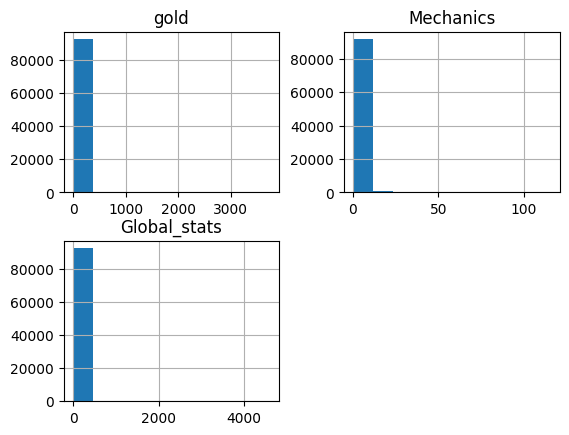

In [123]:
stats[["gold","Mechanics","Global_stats"]].hist()

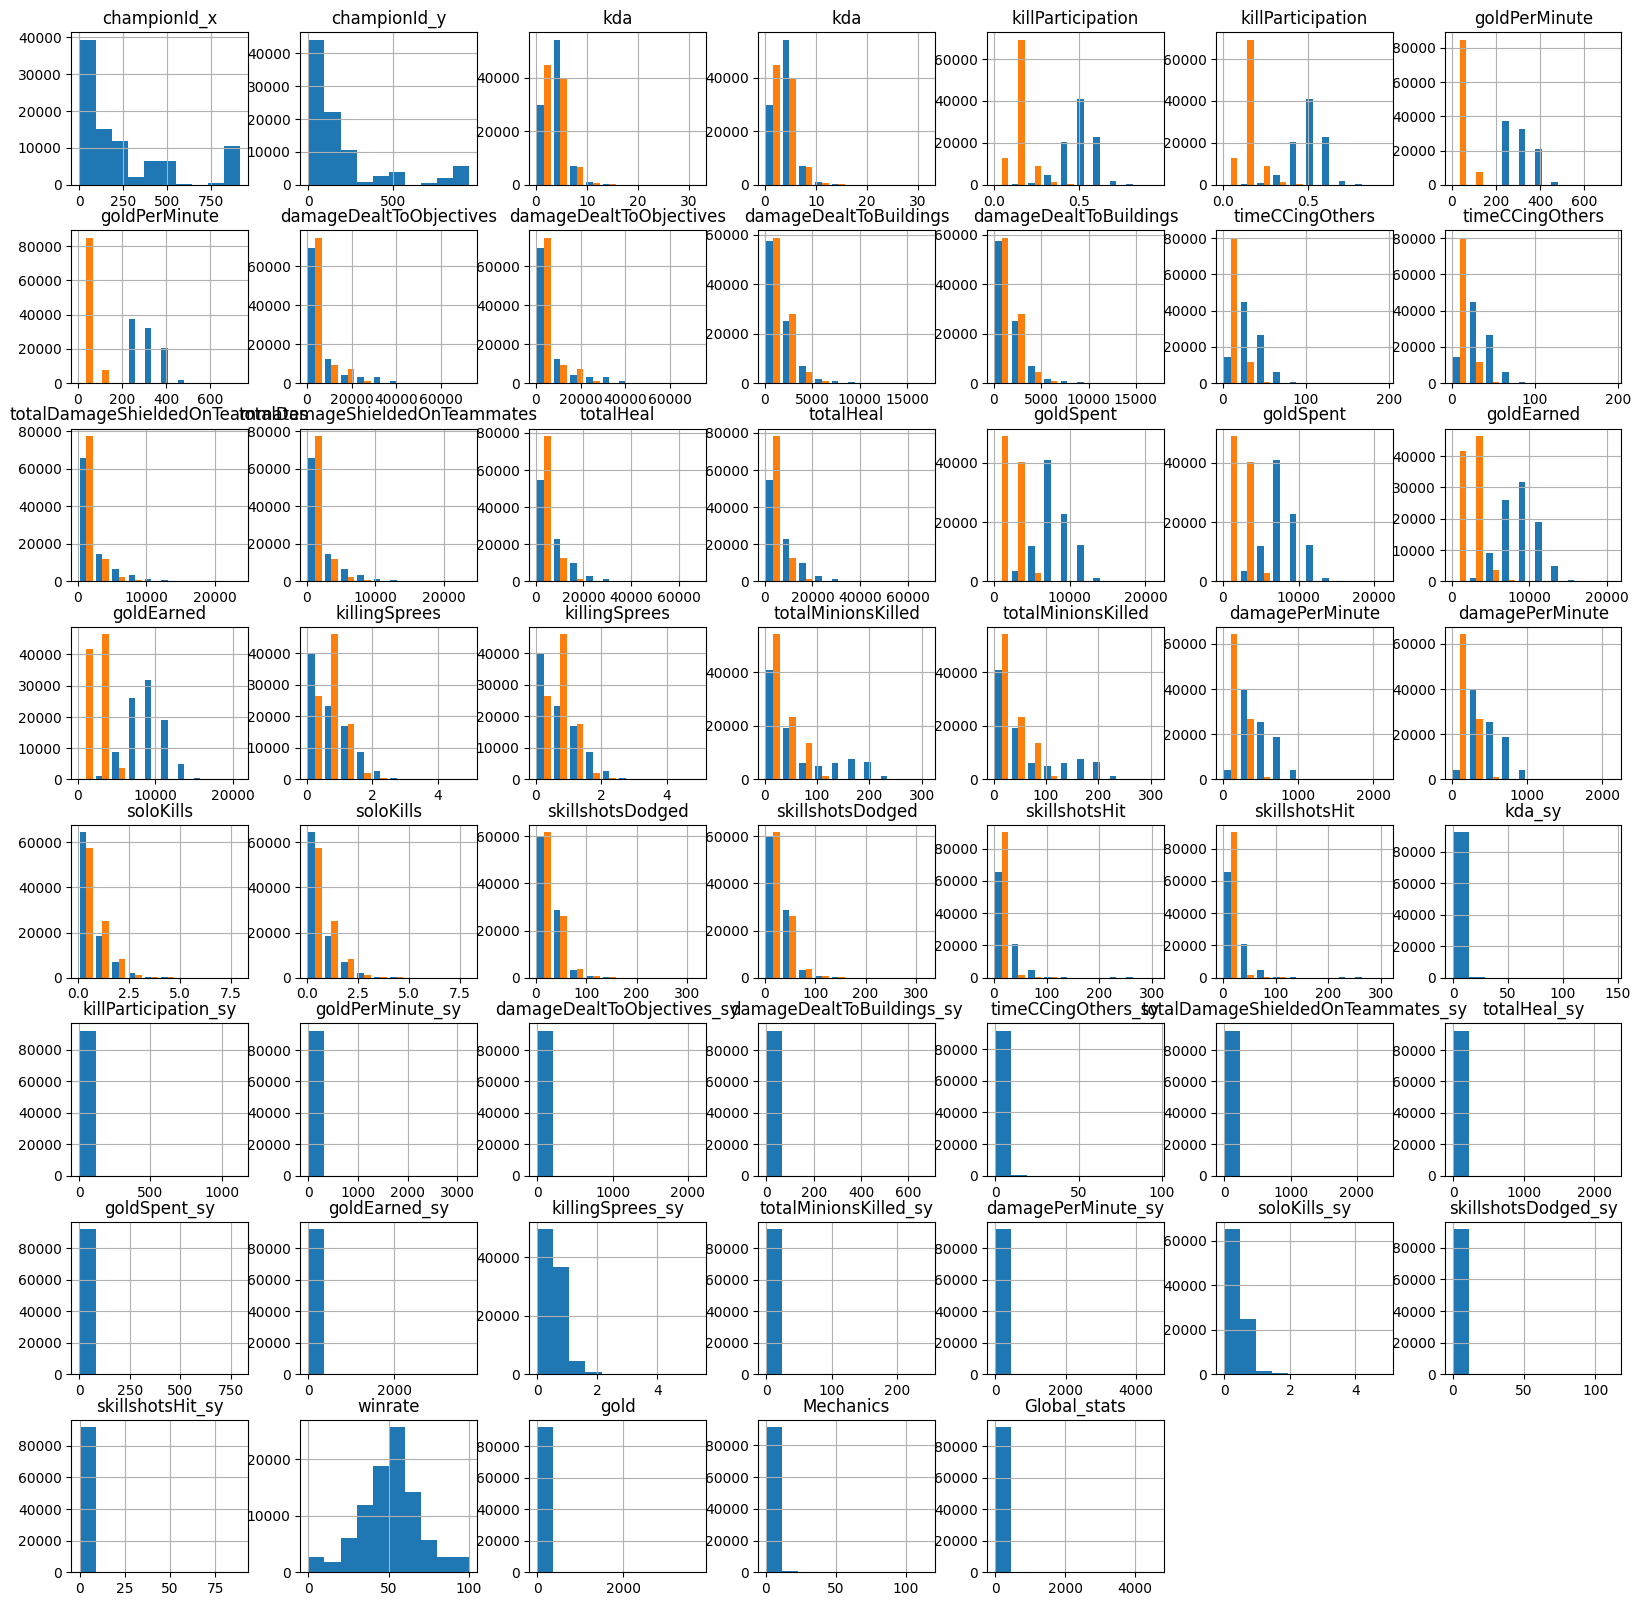

In [124]:
import matplotlib.pyplot as plt
stats.hist(figsize=(20, 20))
plt.show()

array([[<Axes: title={'center': 'championId_x'}>,
        <Axes: title={'center': 'championId_y'}>,
        <Axes: title={'center': 'kda'}>, <Axes: title={'center': 'kda'}>,
        <Axes: title={'center': 'killParticipation'}>,
        <Axes: title={'center': 'killParticipation'}>,
        <Axes: title={'center': 'goldPerMinute'}>],
       [<Axes: title={'center': 'goldPerMinute'}>,
        <Axes: title={'center': 'damageDealtToObjectives'}>,
        <Axes: title={'center': 'damageDealtToObjectives'}>,
        <Axes: title={'center': 'damageDealtToBuildings'}>,
        <Axes: title={'center': 'damageDealtToBuildings'}>,
        <Axes: title={'center': 'timeCCingOthers'}>,
        <Axes: title={'center': 'timeCCingOthers'}>],
       [<Axes: title={'center': 'totalDamageShieldedOnTeammates'}>,
        <Axes: title={'center': 'totalDamageShieldedOnTeammates'}>,
        <Axes: title={'center': 'totalHeal'}>,
        <Axes: title={'center': 'totalHeal'}>,
        <Axes: title={'center': 'g

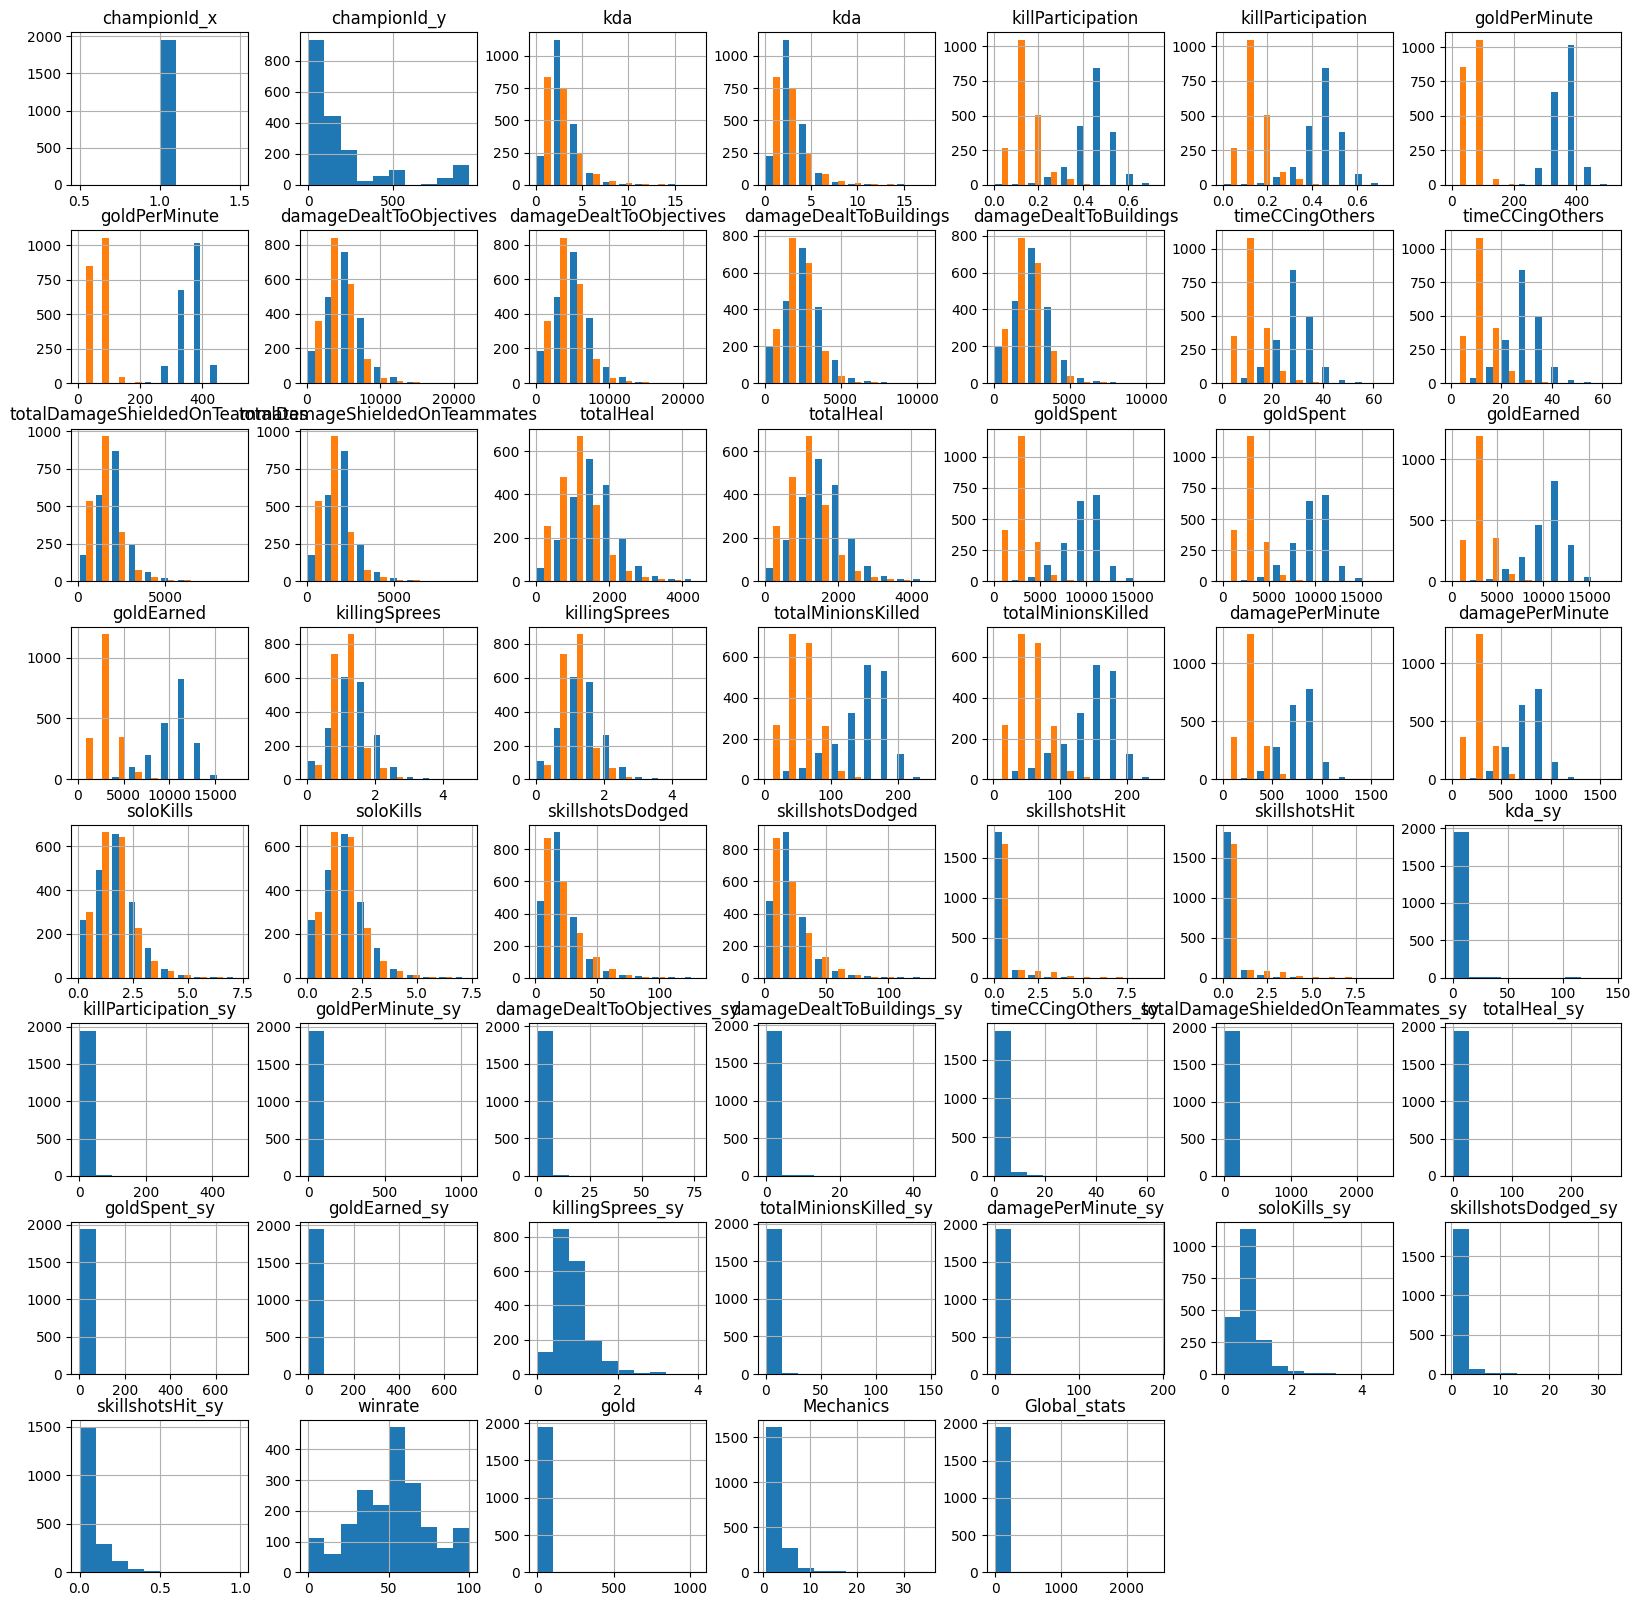

In [125]:
stats[stats["championId_x"]==1 ].hist(figsize=(20, 20))

In [165]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
feature = ["kda", "killParticipation", "goldPerMinute","damageDealtToObjectives","damageDealtToBuildings","timeCCingOthers","totalDamageShieldedOnTeammates","totalHeal","goldSpent","goldEarned","killingSprees","totalMinionsKilled","damagePerMinute","soloKills","skillshotsDodged","skillshotsHit"]
test = jcj.groupby(["championId_x","championId_y","elo","direct","enemy"])[feature].agg(["std","mean"])
test=test.dropna()
#test[["skillshotsHit","damageDealtToObjectives","timeCCingOthers","damageDealtToBuildings","totalHeal","killingSprees","soloKills"]]= test[["skillshotsHit","damageDealtToObjectives","timeCCingOthers","damageDealtToBuildings","totalHeal","killingSprees","soloKills"]].fillna(0)
test = test.replace([float("inf"), float("-inf")], float("nan"))

test["influence"]= test.xs('std', axis=1, level=1).mean(axis=1)
test["impact"]= test.xs('mean', axis=1, level=1).mean(axis=1)


normalized_f=["championId_x","championId_y","elo","direct","enemy","influence",'impact']
test.columns=test.columns.droplevel(1)
test=test.dropna().reset_index()
test= test.rename(str,axis="columns") 
df_normalized = test[normalized_f].copy()  


for champ in test["championId_x"].unique() : 
    for d in test[test["championId_x"]==champ]["direct"].unique():
       for e in  test[(test["championId_x"]==champ)&(test["direct"]==d)]["enemy"].unique():
        '''scaler = MinMaxScaler()
    
        df_normalized.loc[df_normalized["championId_x"]==champ,col] = pd.DataFrame(scaler.fit_transform(test[test["championId_x"]==champ][["influence","impact"]]), columns=["influence","impact"])'''
        print(champ)
        col="influence"
        df_normalized.loc[(df_normalized["championId_x"]==champ)&(df_normalized["direct"]==d)&(df_normalized["enemy"]==e),col]  = (test[(test["championId_x"]==champ)&(test["direct"]==d)&(test["enemy"]==e)][col] - test[(test["championId_x"]==champ)&(test["direct"]==d)&(test["enemy"]==e)][col].min()) / (test[(test["championId_x"]==champ)&(test["direct"]==d)&(test["enemy"]==e)][col].max() - test[(test["championId_x"]==champ)&(test["direct"]==d)&(test["enemy"]==e)][col].min())
        col="impact"
        df_normalized.loc[(df_normalized["championId_x"]==champ)&(df_normalized["direct"]==d)&(df_normalized["enemy"]==e),col]  = (test[(test["championId_x"]==champ)&(test["direct"]==d)&(test["enemy"]==e)][col] - test[(test["championId_x"]==champ)&(test["direct"]==d)&(test["enemy"]==e)][col].min()) / (test[(test["championId_x"]==champ)&(test["direct"]==d)&(test["enemy"]==e)][col].max() - test[(test["championId_x"]==champ)&(test["direct"]==d)&(test["enemy"]==e)][col].min())


df_normalized.head(10)

1
1
1
1
2
2
2
2
3
3
3
3
4
4
4
4
5
5
5
5
6
6
6
6
7
7
7
7
8
8
8
8
9
9
9
9
10
10
10
10
11
11
11
11
12
12
12
12
13
13
13
13
14
14
14
14
15
15
15
15
16
16
16
16
17
17
17
17
18
18
18
18
19
19
19
19
20
20
20
20
21
21
21
21
22
22
22
22
23
23
23
23
24
24
24
24
25
25
25
25
26
26
26
26
27
27
27
27
28
28
28
28
29
29
29
29
30
30
30
30
31
31
31
31
32
32
32
32
33
33
33
33
34
34
34
34
35
35
35
35
36
36
36
36
37
37
37
37
38
38
38
38
39
39
39
39
40
40
40
40
41
41
41
41
42
42
42
42
43
43
43
43
44
44
44
44
45
45
45
45
48
48
48
48
50
50
50
50
51
51
51
51
53
53
53
53
54
54
54
54
55
55
55
55
56
56
56
56
57
57
57
57
58
58
58
58
59
59
59
59
60
60
60
60
61
61
61
61
62
62
62
62
63
63
63
63
64
64
64
64
67
67
67
67
68
68
68
68
69
69
69
69
72
72
72
72
74
74
74
74
75
75
75
75
76
76
76
76
77
77
77
77
78
78
78
78
79
79
79
79
80
80
80
80
81
81
81
81
82
82
82
82
83
83
83
83
84
84
84
84
85
85
85
85
86
86
86
86
89
89
89
89
90
90
90
90
91
91
91
91
92
92
92
92
96
96
96
96
98
98
98
98
99
99
99
99
101
101
101
101
102
102
102


,championId_x,championId_y,elo,direct,enemy,influence,impact
0,1,2,DIAMOND,False,False,0.333335,0.213131
1,1,2,DIAMOND,False,True,0.331927,0.376861
2,1,2,EMERALD,False,False,0.489736,0.275934
3,1,2,EMERALD,False,True,0.291366,0.501910
4,1,2,GOLD,False,False,0.429243,0.574953
5,1,2,GOLD,False,True,0.761813,0.667109
6,1,2,PLATINUM,False,False,0.324056,0.228926
7,1,2,PLATINUM,False,True,0.214025,0.212073
8,1,2,PLATINUM,True,False,0.000000,0.734999
9,1,3,DIAMOND,False,False,0.473087,0.535852


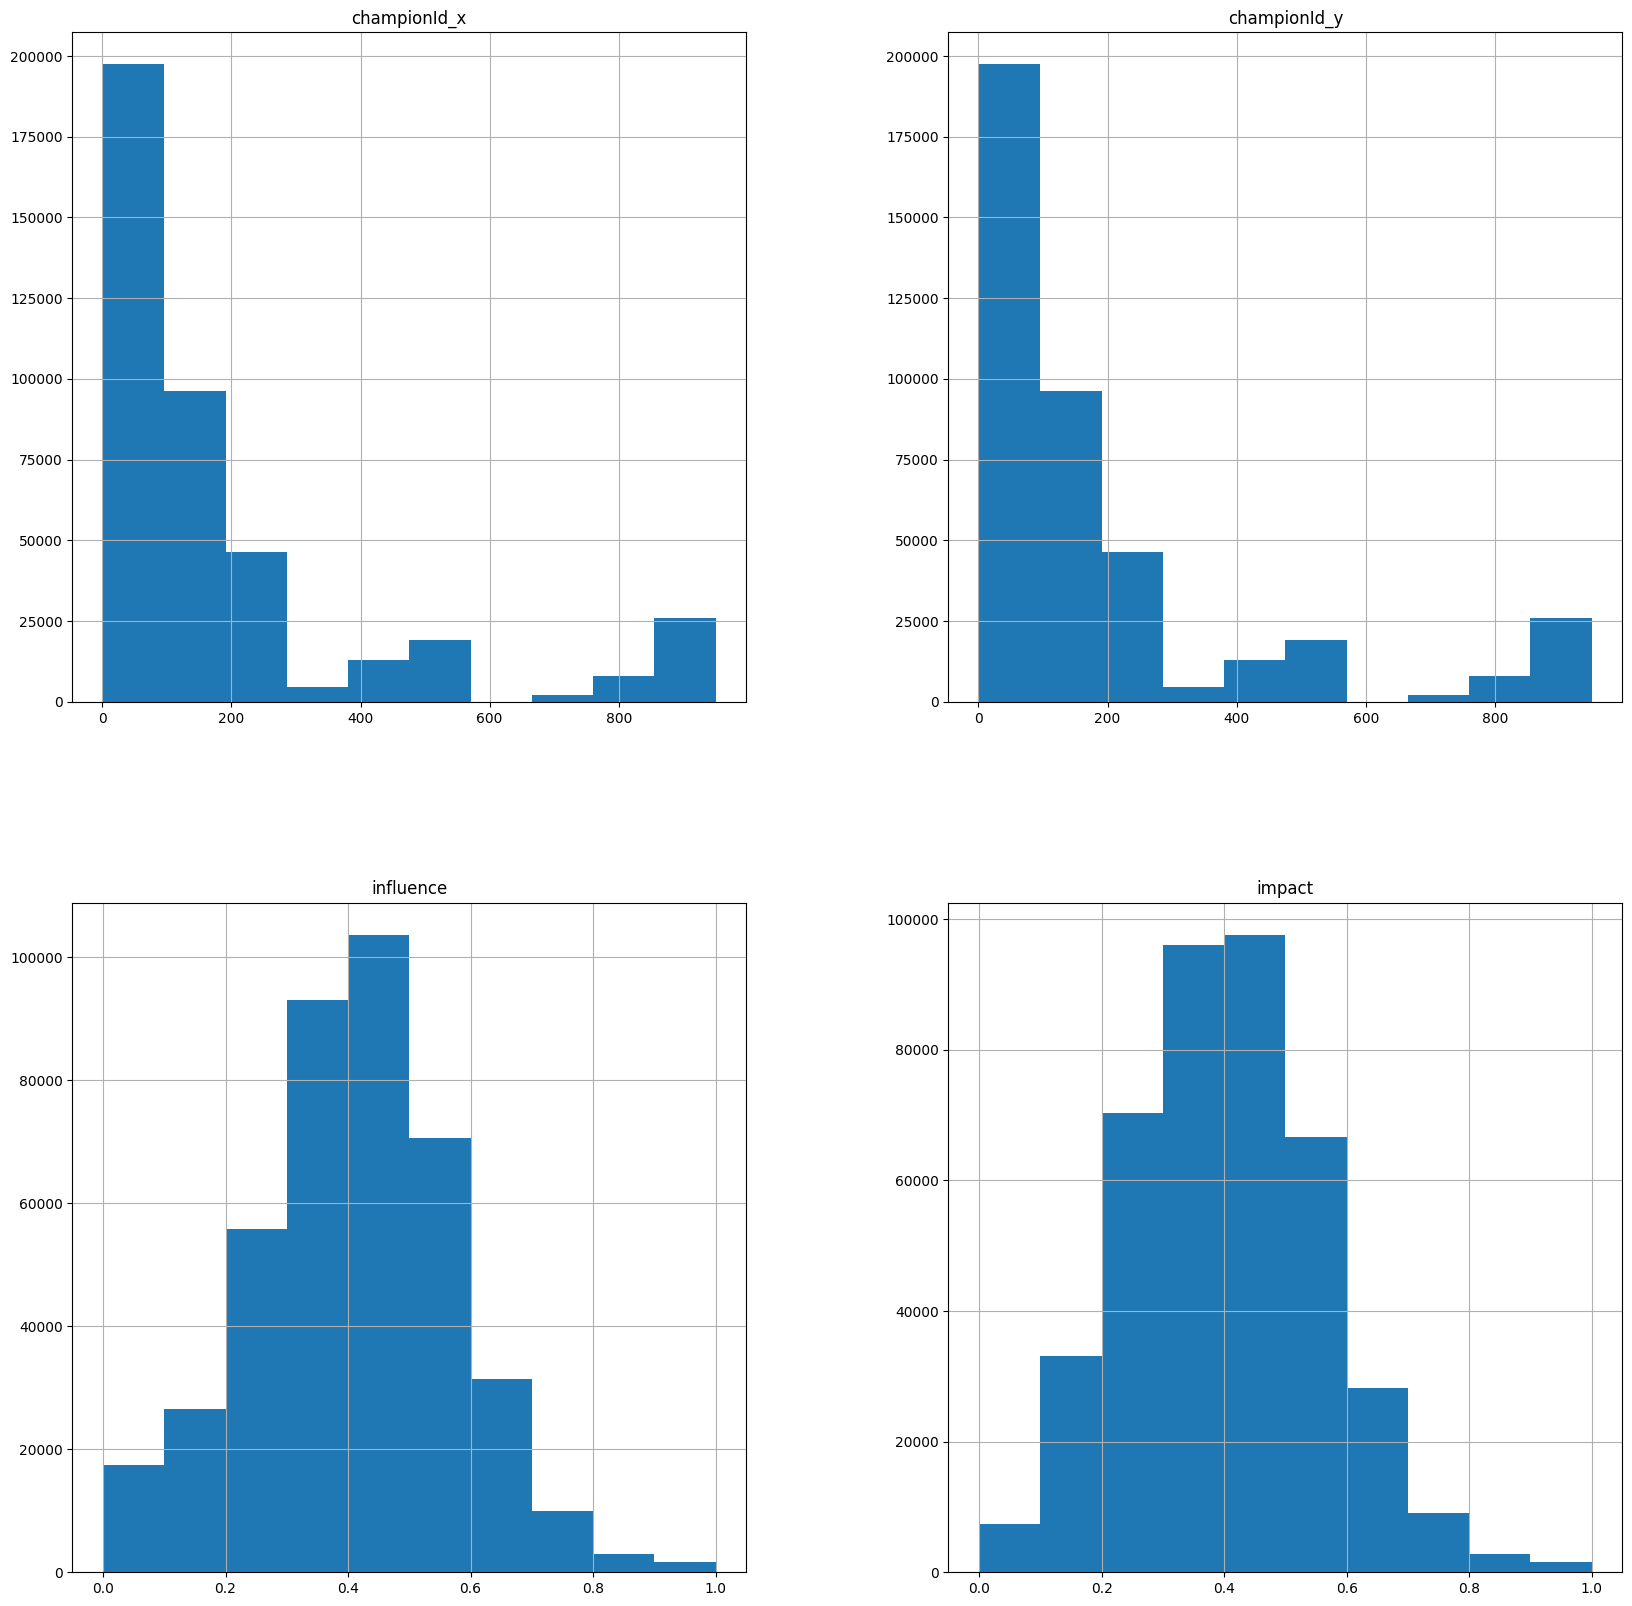

In [166]:
df_normalized.hist(figsize=(20, 20))
plt.show()